# Distribution of predictions

Right now, sums are generated by randomly sampling `n_terms` numbers in the range \[0, `n_digits`\]. the problem with this is that sums summing "around the middle" occur most often. For example, if `n_digits=2` and `n_terms=2`, then sums are from 0+0 to 99+99, giving a range of 0 to 198. Thus sums summing to the midpoint of 99 occur the most often, and very few training examples are generated for sums summing to the lower or higher end. So the point of this notebook is to write functions that can generate a uniform distribution of sums with respect to the sum.

In [17]:
import numpy as np
from matplotlib import pyplot as plt
import random

## Baseline

In [9]:
def generate_sample(n_terms, n_digits):
    x = [np.random.randint(10 ** n_digits - 1) for _ in range(n_terms)]
    y = np.sum(x)
    return x, y

In [75]:
sums = []
x_s = []

for _ in range(10**5):
    x, y = generate_sample(3, 2)
    x_s.extend(x)
    sums.append(y)

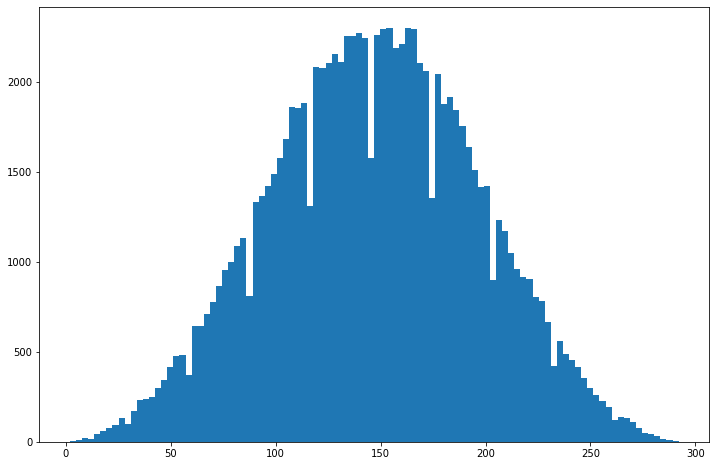

In [14]:
plt.figure(figsize=(12, 8))
plt.hist(sums, bins=100);

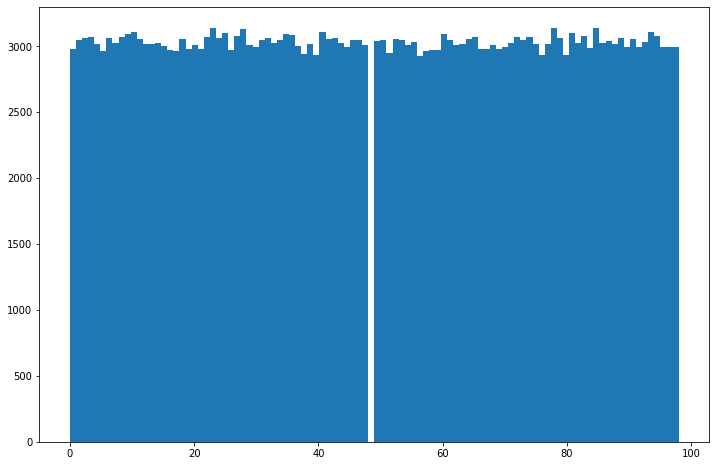

In [76]:
plt.figure(figsize=(12, 8))
plt.hist(x_s, bins=100);

## Uniform sampling

In [66]:
def generate_uniform_sample(n_terms, n_digits, y):
    x = []
    while len(x) < n_terms - 1:
        y_upper_bound = y - np.sum(x)
        n_digits_upper_bound = 10 ** n_digits - 1
        upper_bound = min([y_upper_bound, n_digits_upper_bound])
        
        if upper_bound > 0:
            x.append(np.random.randint(upper_bound+1))
        else:
            x.append(0)
    x.append(y - np.sum(x))
    random.shuffle(x)
    return x, y

In [71]:
def uniform_samples(n_terms, n_digits):
    max_sum = (10**n_digits - 1) * n_terms
    possible_sums = range(max_sum + 1)

    sums = []
    x_s = []
    for _ in range(10**5):
        x, y = generate_uniform_sample(n_terms, n_digits, np.random.choice(possible_sums))
        sums.append(y)
        x_s.extend(x)
    return x_s, sums

In [72]:
x_s, sums = uniform_samples(n_terms=2, n_digits=2)

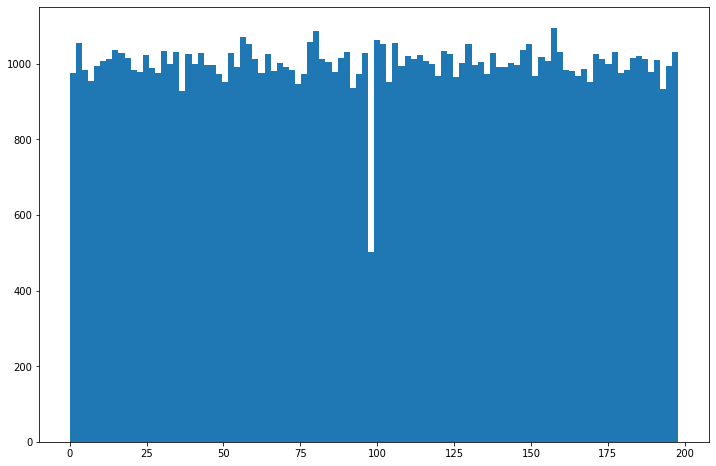

In [73]:
plt.figure(figsize=(12, 8))
plt.hist(sums, bins=100);

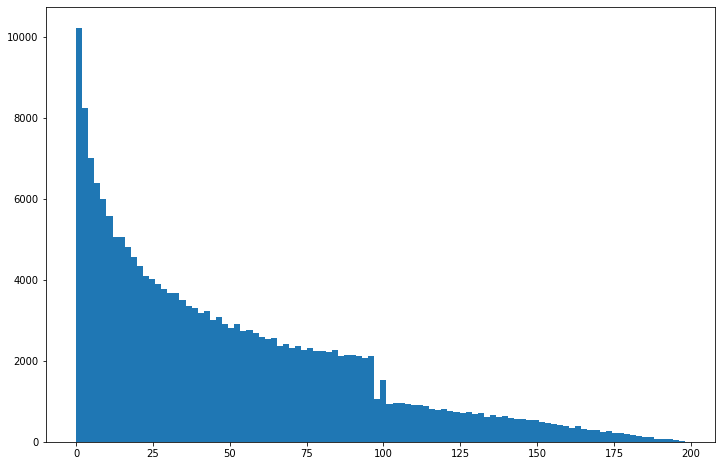

In [74]:
plt.figure(figsize=(12, 8))
plt.hist(x_s, bins=100);